In [1]:
import os

os.chdir("C:\\Users\\olya\\Downloads")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
AH = pd.read_csv('PRODUCT_LIST.CSV', sep=";",encoding='Windows-1251', header = 0, index_col=False)
df = pd.read_csv('SALE_LIST.csv', sep=";",encoding='Windows-1251', header = 0, index_col=False)

In [3]:
df.head()

,date,product_code,rest_code,product_count
0,06.01.2009,824021,Озерный,4
1,06.01.2009,824068,Озерный,1
2,06.01.2009,824070,Озерный,2
3,06.01.2009,824073,Озерный,1
4,06.01.2009,824074,Озерный,1


In [4]:
AH.head()

,Product_code,Product_name,Unnamed: 2,Unnamed: 3
0,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN
1,821002,Кофе ДОППИО 60мл,NaN,NaN
2,821003,Кофе РИСТРЕТТО 20 мл,NaN,NaN
3,821004,Фильтр кофе Верньяно250мл,NaN,NaN
4,821005,Кофе ЛУНГО 50 мл,NaN,NaN


In [5]:
AH.rename(columns = {'Product_code':'product_code'}, inplace = True)

In [6]:
mergeList = AH.merge(df, on=['product_code'])

In [7]:
topm = mergeList[mergeList['rest_code'] == 'Мечта'].sort_values('product_count', ascending = False)
topo = mergeList[mergeList['rest_code'] == 'Озерный'].sort_values('product_count', ascending = False)

In [8]:
topm

,product_code,Product_name,Unnamed: 2,Unnamed: 3,date,rest_code,product_count
32928,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,16.05.2010,Мечта,239
33770,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,21.04.2012,Мечта,233
33804,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,13.05.2012,Мечта,219
33810,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,19.05.2012,Мечта,208
32936,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,23.05.2010,Мечта,207
...,...,...,...,...,...,...,...
130051,892433,Эклер ванильный 60г,NaN,NaN,16.09.2011,Мечта,-4
51412,822164,Раф кофе 300мл,NaN,NaN,17.03.2013,Мечта,-5
114777,892175,Эклер ванильный 70г,NaN,NaN,05.03.2010,Мечта,-5
116696,892370,Эклер шоколадный 60г,NaN,NaN,05.03.2010,Мечта,-5


In [9]:
top5m = list(topm.groupby('Product_name')['product_count'].sum().sort_values(ascending = False).head(5).index.values)
print(top5m)

['Кофе Латте 300мл', 'Кофе КАПУЧИНО 150мл', 'Кофе АМЕРИКАНО 90мл', 'Кофе ЭСПРЕССО  30 мл', 'Раф кофе 300мл']


<AxesSubplot:xlabel='Product_name'>

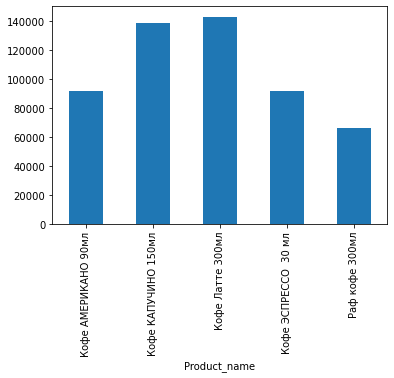

In [10]:
topm[topm['Product_name'].isin(top5m)].groupby('Product_name')['product_count'].sum().plot.bar()

In [11]:
topm['product_count'].sum()

1254434

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Кофе АМЕРИКАНО 90мл'),
  Text(2, 0, 'Кофе КАПУЧИНО 150мл'),
  Text(3, 0, 'Кофе Латте 300мл'),
  Text(4, 0, 'Кофе ЭСПРЕССО  30 мл'),
  Text(5, 0, 'Раф кофе 300мл')])

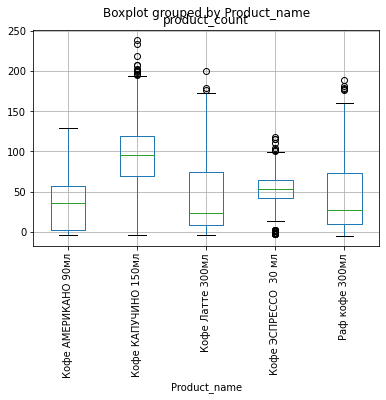

In [12]:
topm[topm['Product_name'].isin(top5m)].boxplot(column='product_count',by='Product_name')
plt.xticks(rotation=90)

In [13]:
topo

,product_code,Product_name,Unnamed: 2,Unnamed: 3,date,rest_code,product_count
31150,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,05.02.2010,Озерный,67
31270,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,28.05.2010,Озерный,64
31233,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,22.04.2010,Озерный,62
31191,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,16.03.2010,Озерный,57
31408,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,07.10.2010,Озерный,56
...,...,...,...,...,...,...,...
32189,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,04.09.2012,Озерный,-2
36766,822087,Кофе Латте 300мл,NaN,NaN,20.09.2012,Озерный,-2
32609,822006,Кофе КАПУЧИНО 150мл,NaN,NaN,06.09.2013,Озерный,-2
7056,821005,Кофе ЛУНГО 50 мл,NaN,NaN,08.01.2010,Озерный,-2


In [14]:
top5o = list(topo.groupby('Product_name')['product_count'].sum().sort_values(ascending = False).head(5).index.values)
print(top5o)

['Кофе КАПУЧИНО 150мл', 'Кофе Латте 300мл', 'Кофе ЭСПРЕССО  30 мл', 'Кофе АМЕРИКАНО 90мл', 'Раф кофе 300мл']


<AxesSubplot:xlabel='Product_name'>

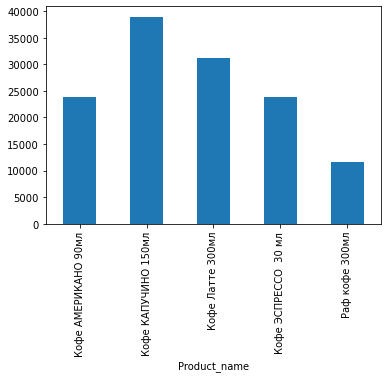

In [15]:
topo[topo['Product_name'].isin(top5o)].groupby('Product_name')['product_count'].sum().plot.bar()

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Кофе АМЕРИКАНО 90мл'),
  Text(2, 0, 'Кофе КАПУЧИНО 150мл'),
  Text(3, 0, 'Кофе Латте 300мл'),
  Text(4, 0, 'Кофе ЭСПРЕССО  30 мл'),
  Text(5, 0, 'Раф кофе 300мл')])

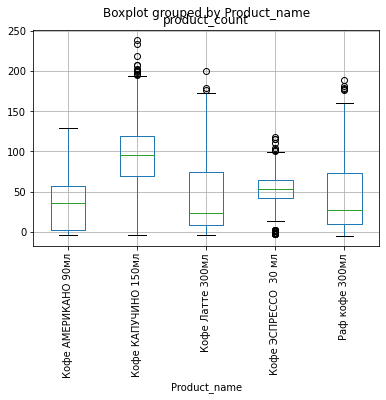

In [16]:
topm[topm['Product_name'].isin(top5m)].boxplot(column='product_count',by='Product_name')
plt.xticks(rotation=90)

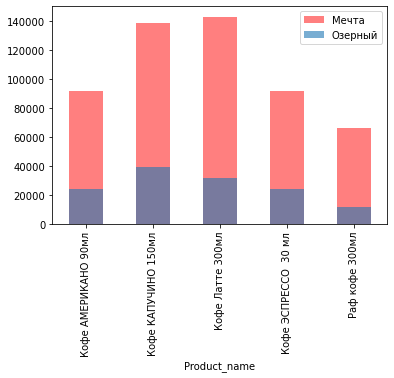

In [17]:
gtopm=topm[topm['Product_name'].isin(top5m)].groupby('Product_name')['product_count'].sum().plot.bar(alpha=0.5,color='red')
gtopo=topo[topo['Product_name'].isin(top5o)].groupby('Product_name')['product_count'].sum().plot.bar(alpha=0.6)
plt.legend(['Мечта','Озерный'])

In [18]:
topm['product_count'].sum()


1254434

In [19]:
topo['product_count'].sum()

291882

<AxesSubplot:>

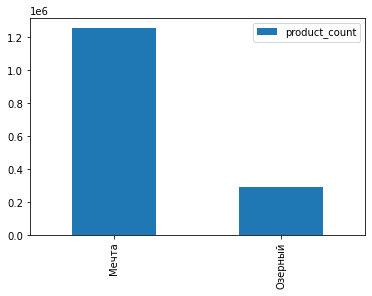

In [20]:
df1=pd.DataFrame(data={'product_count':[topm['product_count'].sum(),topo['product_count'].sum()]},index=['Мечта','Озерный'])
df1.plot.bar()

In [21]:
df

,date,product_code,rest_code,product_count
0,06.01.2009,824021,Озерный,4
1,06.01.2009,824068,Озерный,1
2,06.01.2009,824070,Озерный,2
3,06.01.2009,824073,Озерный,1
4,06.01.2009,824074,Озерный,1
...,...,...,...,...
135915,26.05.2013,892545,Мечта,3
135916,27.05.2013,892545,Мечта,1
135917,28.05.2013,892545,Мечта,3
135918,29.05.2013,892545,Мечта,4


<AxesSubplot:title={'center':'product_count'}, xlabel='rest_code'>

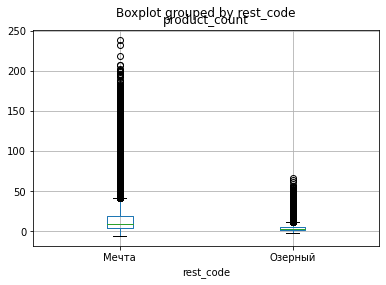

In [22]:
df.boxplot(column='product_count', by='rest_code')